In [2]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("./data/cleaned.csv")
sns.set_theme(style="whitegrid")

In [3]:
df.columns.tolist()

['Rk',
 'Player',
 'Nation',
 'Pos',
 'Squad',
 'Comp',
 'Age',
 'Born',
 'MP',
 'Starts',
 'Min',
 '90s',
 'Gls',
 'Ast',
 'G+A',
 'G-PK',
 'PK',
 'PKatt',
 'CrdY',
 'CrdR',
 'xG',
 'npxG',
 'xAG',
 'npxG+xAG',
 'PrgC',
 'PrgP',
 'PrgR',
 'Gls_90',
 'Ast_90',
 'G+A_90',
 'G-PK_90',
 'G+A-PK_90',
 'xG_90',
 'xAG_90',
 'xG+xAG_90',
 'npxG_90',
 'npxG+xAG_90']

In [4]:
def first_present(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

PLAYER = first_present(df, ["p  layer","Player","player_name","name","joueur","nom"])
CLUB   = first_present(df, ["club","Club","team","squad","équipe","equipe", "Squad"])
LEAGUE = first_present(df, ["league","League","competition","Competition", "Comp"])
POS    = first_present(df, ["position","positions","Position","Positions","pos","Pos"])
MIN    = first_present(df, ["minutes","Minutes","Min"])
GOALS  = first_present(df, ["goals","Goals","Gls"])
G90    = first_present(df, ["goals_90","Goals_90","Gls_90"])
AST    = first_present(df, ["assists","Assists","Ast"])
YC     = first_present(df, ["yellow_cards","cards_yellow","Yellow","yellow","YC", "CrdY"])
RC     = first_present(df, ["red_cards","cards_red","Red","red","RC", "CrdR"])
XG     = first_present(df, ["xG", "XG", "xg"])
AGE    = first_present(df, ["AGE", "Age"])


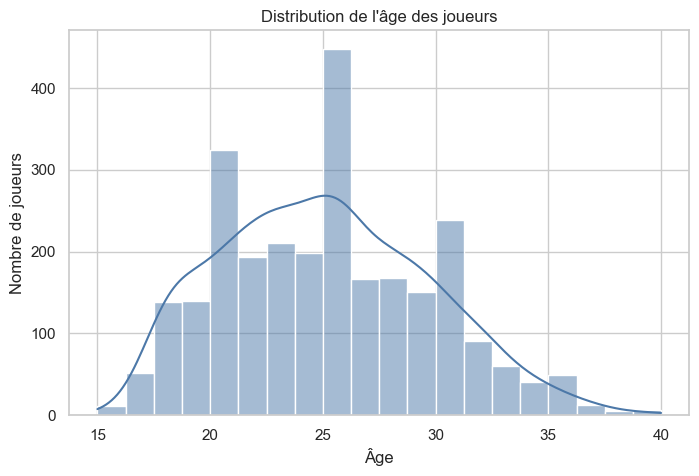

In [5]:
if AGE in df.columns:
    fig, ax = plt.subplots(figsize=(8,5))
    sns.histplot(df[AGE].dropna(), bins=20, kde=True, ax=ax, color="#4C78A8")
    ax.set_title("Distribution de l'âge des joueurs")
    ax.set_xlabel("Âge")
    ax.set_ylabel("Nombre de joueurs")
    plt.show()


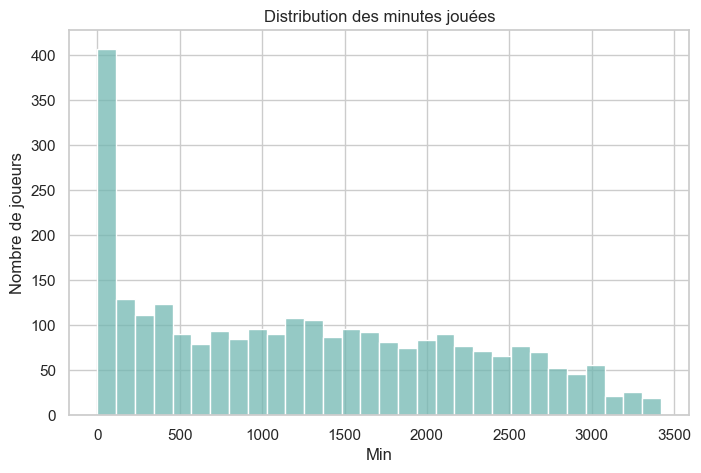

In [6]:
if MIN in df.columns:
    fig, ax = plt.subplots(figsize=(8,5))
    sns.histplot(df[MIN].dropna(), bins=30, kde=False, ax=ax, color="#72B7B2")
    ax.set_title("Distribution des minutes jouées")
    ax.set_xlabel(MIN)
    ax.set_ylabel("Nombre de joueurs")
    ax.set_yscale("linear")
    plt.show()


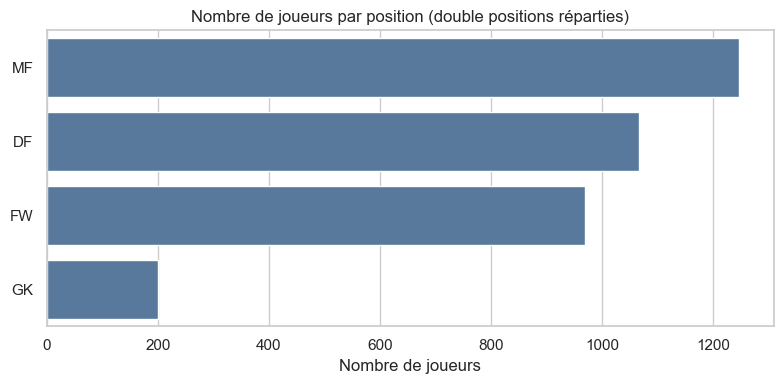

In [7]:
if POS:
    splitter = re.compile(r"[()\s,/\-]+")
    tokens_series = (
        df[POS].dropna().astype(str)
          .apply(lambda s: [t for t in splitter.split(s) if t != ""])
    )
    pos_counts = (
        pd.Series([p for lst in tokens_series for p in lst])
          .value_counts()
          .rename_axis("Position")
          .reset_index(name="Nombre de joueurs")
    )
    if not pos_counts.empty:
        plt.figure(figsize=(8, max(4, 0.35*len(pos_counts))))
        ax = sns.barplot(data=pos_counts, x="Nombre de joueurs", y="Position", color="#4C78A8")
        ax.set_title("Nombre de joueurs par position (double positions réparties)")
        ax.set_xlabel("Nombre de joueurs"); ax.set_ylabel("")
        plt.tight_layout(); plt.show()
    else:
        print("Aucune position exploitable pour le comptage.")
else:
    print("Colonne position introuvable — candidates: position, positions, pos...")

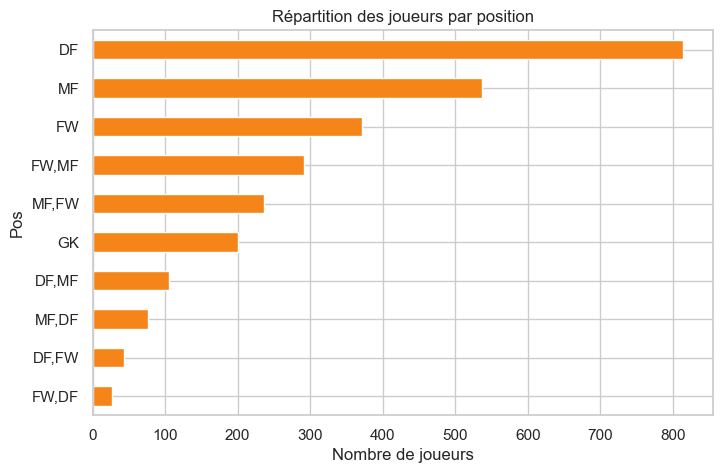

In [8]:
if POS in df.columns:
    fig, ax = plt.subplots(figsize=(8,5))
    df[POS].value_counts().head(15).sort_values().plot(kind="barh", ax=ax, color="#F58518")
    ax.set_title("Répartition des joueurs par position")
    ax.set_xlabel("Nombre de joueurs")
    plt.show()


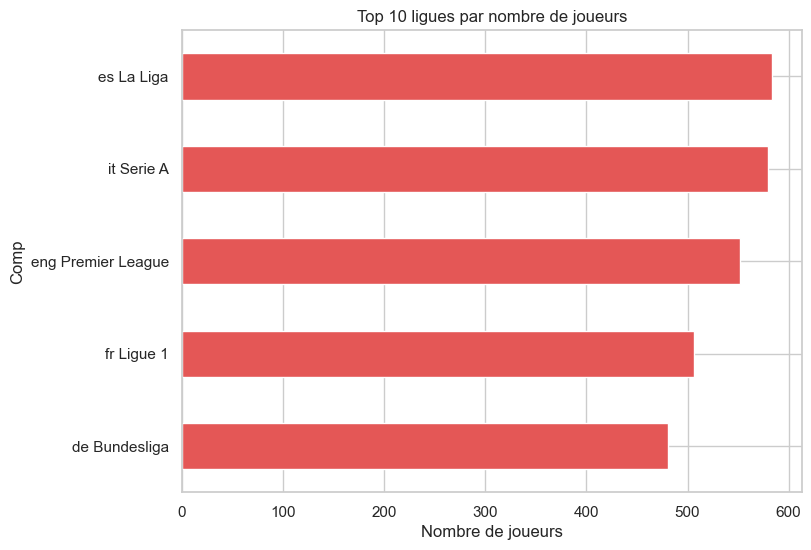

In [9]:
if LEAGUE in df.columns:
    fig, ax = plt.subplots(figsize=(8,6))
    df[LEAGUE].value_counts().head(10).sort_values().plot(kind="barh", ax=ax, color="#E45756")
    ax.set_title("Top 10 ligues par nombre de joueurs")
    ax.set_xlabel("Nombre de joueurs")
    plt.show()


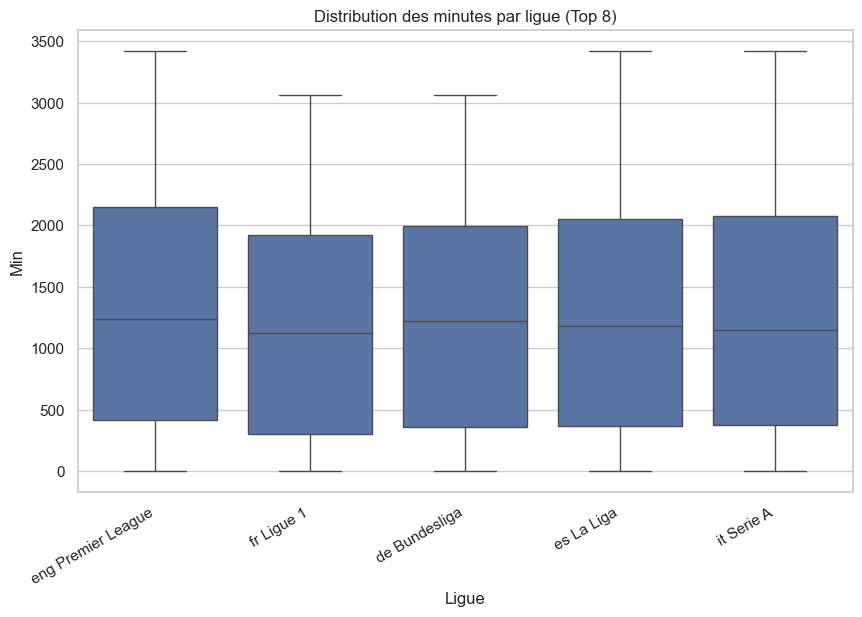

In [10]:
if set([LEAGUE,MIN]).issubset(df.columns):
    top_leagues = df[LEAGUE].value_counts().head(8).index
    fig, ax = plt.subplots(figsize=(10,6))
    sns.boxplot(data=df[df[LEAGUE].isin(top_leagues)], x=LEAGUE, y=MIN, ax=ax)
    ax.set_title("Distribution des minutes par ligue (Top 8)")
    ax.set_xlabel("Ligue"); ax.set_ylabel(MIN)
    plt.xticks(rotation=30, ha="right")
    plt.show()


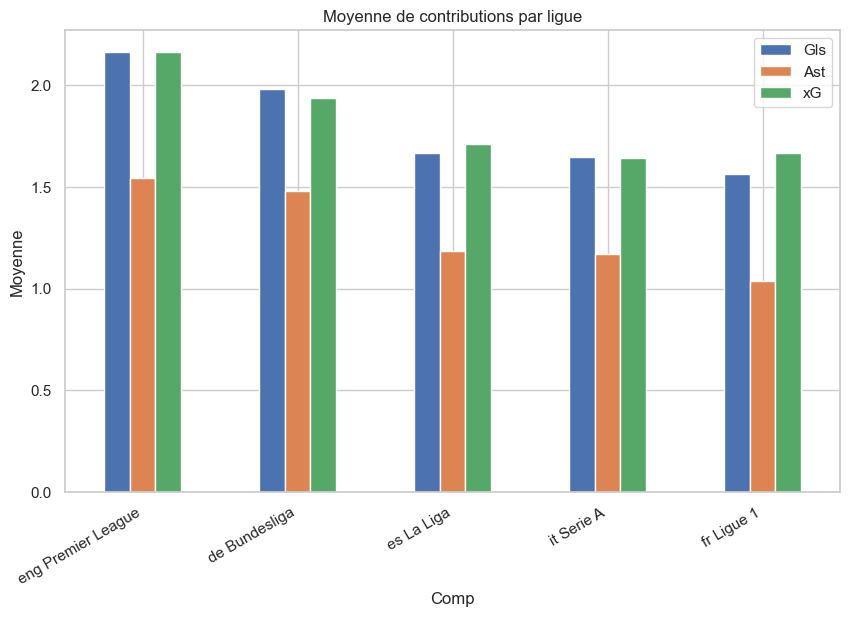

In [11]:
metrics = [c for c in [GOALS,AST,"xG","xA"] if c in df.columns]
if LEAGUE in df.columns and metrics:
    agg = df.groupby(LEAGUE)[metrics].mean().sort_values(by=metrics[0], ascending=False).head(12)
    ax = agg.plot(kind="bar", figsize=(10,6))
    ax.set_title("Moyenne de contributions par ligue")
    ax.set_ylabel("Moyenne")
    plt.xticks(rotation=30, ha="right")
    plt.show()


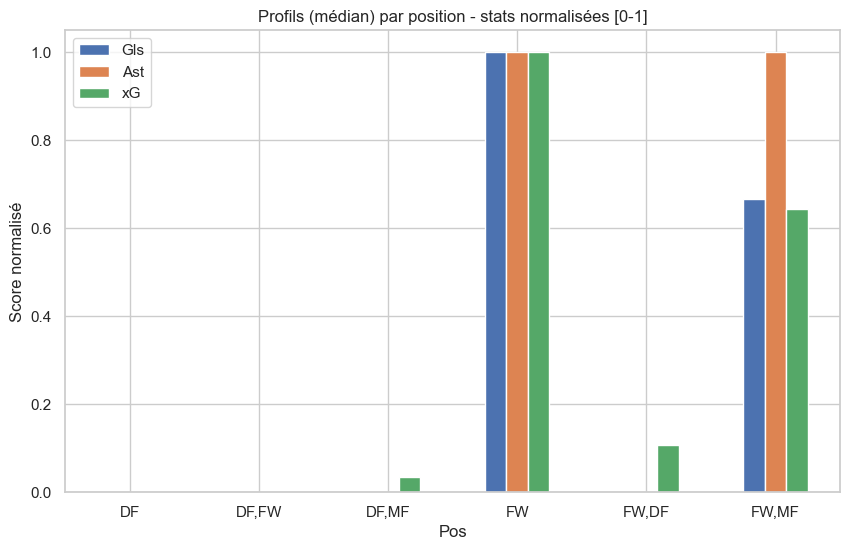

In [12]:
cand_stats = [c for c in [GOALS,AST,"xG","xA","shots","shots_ot"] if c in df.columns]
if POS in df.columns and len(cand_stats)>=3:
    pos_stats = df.groupby(POS)[cand_stats].median().dropna(how="all").head(6)
    pos_stats_norm = (pos_stats - pos_stats.min()) / (pos_stats.max() - pos_stats.min())
    pos_stats_norm.plot(kind="bar", figsize=(10,6))
    plt.title("Profils (médian) par position - stats normalisées [0-1]")
    plt.ylabel("Score normalisé")
    plt.xticks(rotation=0)
    plt.show()


In [13]:
if set([PLAYER,GOALS,MIN]).issubset(df.columns):
    top_scorers = (df[df[MIN]>=900]
                   .sort_values(GOALS, ascending=False)
                   .head(20)[[PLAYER,CLUB,LEAGUE,GOALS,MIN]])
    display(top_scorers)

if set([PLAYER,AST,MIN]).issubset(df.columns):
    top_assisters = (df[df[MIN]>=900]
                     .sort_values(AST, ascending=False)
                     .head(20)[[PLAYER,CLUB,LEAGUE,AST,MIN]])
    display(top_assisters)


,Player,Squad,Comp,Gls,Min
961,Harry Kane,Bayern Munich,de Bundesliga,36,2839
2349,Serhou Guirassy,Stuttgart,de Bundesliga,28,2208
1443,Kylian Mbappé,Paris S-G,fr Ligue 1,27,2158
740,Erling Haaland,Manchester City,eng Premier League,27,2552
268,Artem Dovbyk,Girona,es La Liga,24,2587
1457,Lautaro Martínez,Inter,it Serie A,24,2656
1517,Loïs Openda,RB Leipzig,de Bundesliga,24,2697
123,Alexander Sørloth,Villarreal,es La Liga,23,2489
492,Cole Palmer,Chelsea,eng Premier League,22,2607
119,Alexander Isak,Newcastle Utd,eng Premier League,21,2255


,Player,Squad,Comp,Ast,Min
109,Alex Baena,Villarreal,es La Liga,14,2579
2671,Álex Grimaldo,Leverkusen,de Bundesliga,13,2784
2019,Ollie Watkins,Aston Villa,eng Premier League,13,3217
1319,Julian Brandt,Dortmund,de Bundesliga,11,2223
1113,Jan-Niklas Beste,Heidenheim,de Bundesliga,11,2603
827,Florian Wirtz,Leverkusen,de Bundesliga,11,2372
492,Cole Palmer,Chelsea,eng Premier League,11,2607
1944,Nico Williams,Athletic Club,es La Liga,11,2263
2609,Xavi Simons,RB Leipzig,de Bundesliga,11,2653
1483,Leroy Sané,Bayern Munich,de Bundesliga,11,2137


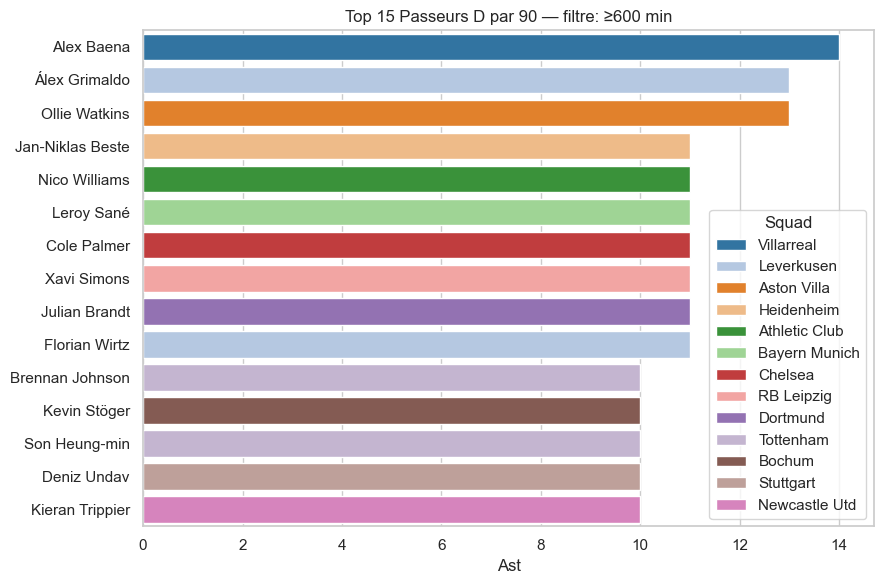

In [14]:
if AST :
    d = df.copy()
    if MIN:
        d = d[d[MIN] >= 600].copy()
    metric = AST if AST and AST in d.columns else GOALS
    if metric and PLAYER in d.columns:
        top = (d[[PLAYER, CLUB, metric]]
               .dropna(subset=[metric])
               .sort_values(metric, ascending=False)
               .head(15))
        if not top.empty:
            plt.figure(figsize=(9, 6))
            ax = sns.barplot(
                data=top,
                x=metric, y=PLAYER,
                hue=CLUB if CLUB in top.columns else None,
                dodge=False, palette="tab20"
            )
            title = "Top 15 Passeurs D"
            title += " par 90" if metric == AST else " (totaux)"
            if MIN: title += " — filtre: ≥600 min"
            ax.set_title(title)
            ax.set_xlabel(metric.replace("_"," ").title()); ax.set_ylabel("")
            if not CLUB or CLUB not in top.columns:
                leg = ax.get_legend()
                if leg: leg.remove()
            plt.tight_layout(); plt.show()
        else:
            print("Aucune donnée pour les meilleurs Passeurs D après filtrage.")
    else:
        print("Colonnes nécessaires manquantes pour le graphique des Passeurs.")
else:
    print("Aucune colonne de buts trouvée (AST).")

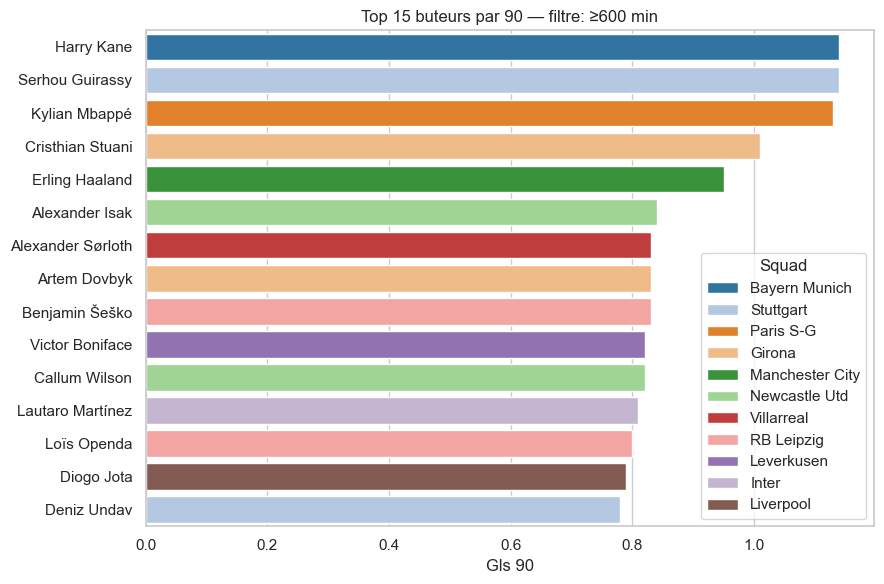

In [15]:
if GOALS or G90:
    d = df.copy()
    if MIN:
        d = d[d[MIN] >= 600].copy()
    metric = G90 if G90 and G90 in d.columns else GOALS
    if metric and PLAYER in d.columns:
        top = (d[[PLAYER, CLUB, metric]]
               .dropna(subset=[metric])
               .sort_values(metric, ascending=False)
               .head(15))
        if not top.empty:
            plt.figure(figsize=(9, 6))
            ax = sns.barplot(
                data=top,
                x=metric, y=PLAYER,
                hue=CLUB if CLUB in top.columns else None,
                dodge=False, palette="tab20"
            )
            title = "Top 15 buteurs"
            title += " par 90" if metric == G90 else " (totaux)"
            if MIN: title += " — filtre: ≥600 min"
            ax.set_title(title)
            ax.set_xlabel(metric.replace("_"," ").title()); ax.set_ylabel("")
            if not CLUB or CLUB not in top.columns:
                leg = ax.get_legend()
                if leg: leg.remove()
            plt.tight_layout(); plt.show()
        else:
            print("Aucune donnée pour les meilleurs buteurs après filtrage.")
    else:
        print("Colonnes nécessaires manquantes pour le graphique des buteurs.")
else:
    print("Aucune colonne de buts trouvée (goals ou goals_per90).")

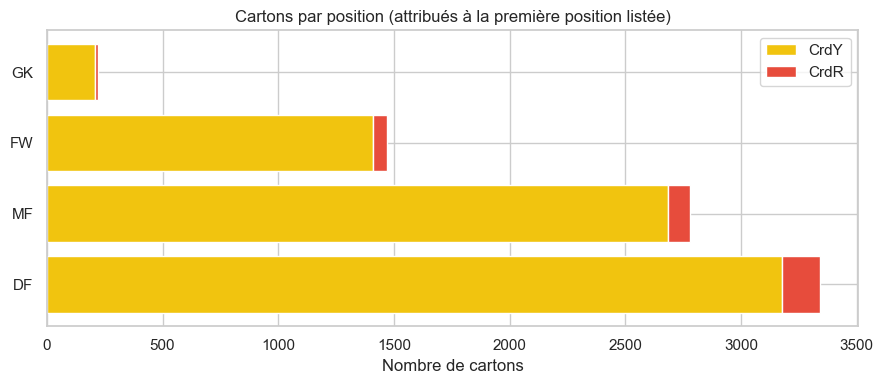

In [16]:
if POS and (YC or RC):
    splitter = re.compile(r"[()\s,/\-]+")
    def first_pos(s):
        if pd.isna(s): return None
        parts = [t for t in splitter.split(str(s)) if t != ""]
        return parts[0] if parts else None

    d = df.copy()
    d["pos1"] = d[POS].apply(first_pos)
    keep_cols = ["pos1"] + [c for c in [YC, RC] if c]
    g = d[keep_cols].dropna(subset=["pos1"]).copy()

    for c in [YC, RC]:
        if c and c in g.columns:
            g[c] = pd.to_numeric(g[c], errors="coerce").fillna(0)

    agg = g.groupby("pos1", dropna=True).sum(numeric_only=True).reset_index()
    total = 0
    if YC and YC in agg.columns: total += agg[YC]
    if RC and RC in agg.columns: total += agg[RC]
    agg = agg.assign(total_cards=total).sort_values("total_cards", ascending=False)

    plt.figure(figsize=(9, max(4, 0.5*len(agg))))
    y_pos = agg["pos1"]
    x_base = range(len(agg))
    bottom = None
    if YC and YC in agg.columns:
        plt.barh(y_pos, agg[YC], color="#F1C40F", label=YC)
        bottom = agg[YC]
    if RC and RC in agg.columns:
        if bottom is None:
            plt.barh(y_pos, agg[RC], color="#E74C3C", label=RC)
        else:
            plt.barh(y_pos, agg[RC], left=agg[YC], color="#E74C3C", label=RC)

    plt.title("Cartons par position (attribués à la première position listée)")
    plt.xlabel("Nombre de cartons"); plt.ylabel("")
    plt.legend(loc="best")
    plt.tight_layout(); plt.show()
else:
    print("Impossible de tracer les cartons par position (position ou colonnes de cartons manquantes).")

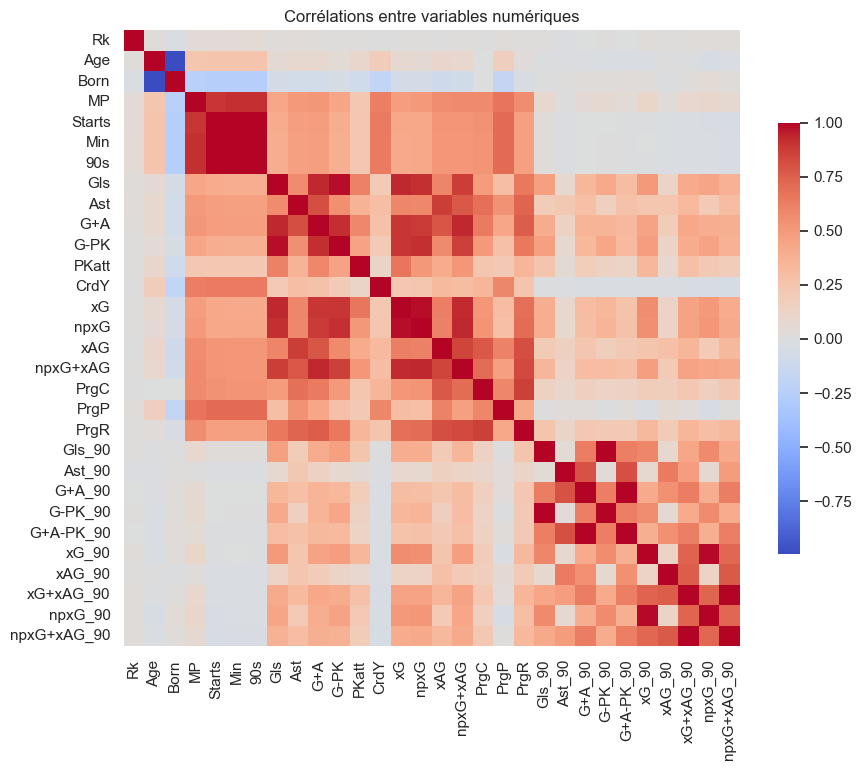

In [17]:
num_df = df.select_dtypes(include=[np.number]).copy()
num_df = num_df.loc[:, num_df.nunique() > 10]
corr = num_df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0, square=True, cbar_kws={"shrink": .7})
plt.title("Corrélations entre variables numériques")
plt.show()
